In [45]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, creator, tools

import warnings
warnings.filterwarnings("ignore")

# Crear funcion de adaptabilidad

In [46]:
reglas = {"beneficio" : [50, 35, 45, 20, 35, 40, 50, 50, 45, 40],
            "peso" : [20, 25, 20, 20, 35, 40, 35, 30, 35, 25],
            "capacidad": 120
            }

def adaptabilidad(individuo):
  beneficio_total = np.dot(individuo, reglas["beneficio"])
  peso_total = np.dot(individuo, reglas["peso"])
  if peso_total > reglas["capacidad"]:
    fitness = beneficio_total - peso_total
  else:
    fitness = beneficio_total

  return fitness,

# Contenedores y operadores geneticos

In [47]:
# Contenedor
toolbox = base.Toolbox()

# Declarar clase función de adaptabilidad
creator.create("FitnessMax", base.Fitness, weights = (1.0,)) # Si la funcion es de minimización weights va en -1.0

# Crear la clase individuo
creator.create("Individual", list, fitness = creator.FitnessMax)

In [48]:
# Construir cromosomas bit
toolbox.register("attribute", rnd.randint, 0, 1)

# Construir el individuo
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n = 10)

#Crear población
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [49]:
individuo = toolbox.individual()
print(individuo)

[1, 1, 0, 1, 1, 1, 1, 0, 1, 1]


In [50]:
poblacion = toolbox.population(n = 5)
print(poblacion)

[[1, 1, 0, 1, 1, 1, 0, 0, 0, 1], [0, 1, 0, 1, 0, 1, 0, 0, 1, 0], [1, 0, 1, 0, 0, 1, 0, 1, 1, 0], [0, 0, 0, 0, 0, 1, 1, 1, 0, 1], [0, 1, 1, 1, 1, 0, 1, 1, 0, 0]]


In [51]:
# Definir las funciones genéticas
# Selección
toolbox.register("select", tools.selTournament, tournsize = 3)

# Cruce
toolbox.register("mate", tools.cxOnePoint)

# Mutación
toolbox.register("mutate", tools.mutFlipBit, indpb = 0.1)

# Evaluación
toolbox.register("evaluate", adaptabilidad)

In [52]:
# Configuración de estadísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Promedio", np.mean)
stats.register("Desviación Estandar", np.std)
stats.register("Mínimo", np.min)
stats.register("Máximo", np.max)

In [53]:
# Implementar proceso evolutivo
population = toolbox.population(n = 102)
population, logbook = algorithms.eaSimple(population, toolbox, cxpb = 1, mutpb = 0.1, ngen = 20, verbose = True, stats = stats)
print(logbook)

gen	nevals	Promedio	Desviación Estandar	Mínimo	Máximo
0  	102   	87.598  	39.6166            	25    	190   
1  	102   	111.961 	41.3211            	10    	200   
2  	102   	131.52  	42.4772            	35    	200   
3  	102   	146.814 	38.1547            	60    	220   
4  	102   	157.304 	42.8671            	55    	220   
5  	102   	170.735 	41.4291            	65    	220   
6  	102   	180.441 	39.8779            	55    	220   
7  	102   	186.961 	44.3922            	65    	220   
8  	102   	200.588 	39.3781            	80    	220   
9  	102   	211.127 	27.4925            	90    	220   
10 	102   	216.422 	17.1123            	100   	220   
11 	102   	214.804 	20.3152            	100   	220   
12 	102   	213.578 	25.6042            	100   	220   
13 	102   	214.265 	25.5949            	55    	220   
14 	102   	217.549 	17.3452            	90    	220   
15 	102   	215     	23.2421            	70    	220   
16 	102   	212.941 	26.9563            	90    	220   
17 	102   	212.451 	28.334  

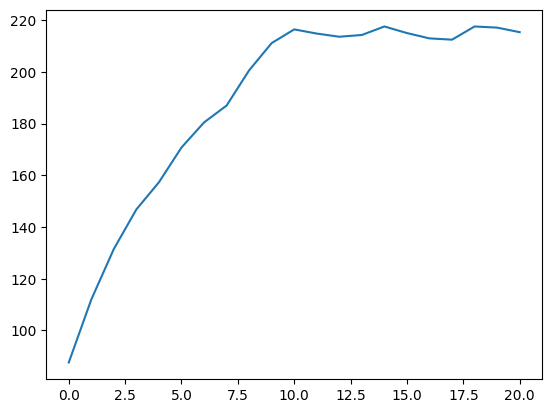

In [54]:
gen = logbook.select("gen")
avgs = logbook.select("Promedio")

plt.plot(gen, avgs)

In [55]:
tools.selBest(population, 1)[0]

[1, 1, 1, 0, 0, 0, 0, 1, 0, 1]